In [1]:
import tensorflow as tf
from matplotlib import pyplot as plt
from tf_funcs import get_cifar10_data, get_mnist_loaders, classifier_overlay, combine_model, FullyConnectedNet
import numpy as np

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  try:
    for gpu in gpus:
      tf.config.experimental.set_memory_growth(gpu, True)
  except RuntimeError as e:
    print(e)

2023-05-23 02:45:43.839611: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-23 02:45:45.876225: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-05-23 02:45:45.882392: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-05-

In [3]:
# config
batch_size = 3
test_batch_size = 6
epochs = 2
lr = 1e-2
momentum = 0.0
inputs = tf.keras.layers.Input(shape=(32,32,3))
optimizer = tf.keras.optimizers.SGD(learning_rate=lr, momentum=momentum)
loss_func = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False)

`from_logits=False` in case of softmax activation, `True` in any other case,
logits being what comes out of output neurons after feed forward before applying last activation.  
  
No need to check whether CUDA is used as it is prioritized by default in TensorFlow. Device
used for computation printed out at model compilation.  
  
Add `model.summary()` to see architecture and number of params.

In [4]:
def whole_thing(predef_model, preprocess, batch_size, test_batch_size):
	x_train, y_train, x_test, y_test = get_cifar10_data(preprocess)

	model = combine_model(inputs, predef_model, classifier_overlay)
	model.compile(optimizer=optimizer, loss=loss_func, metrics=['accuracy'])

	train_history = model.fit(
		x_train, y_train,
		batch_size=batch_size,
		validation_data=(x_test, y_test),
		validation_batch_size=test_batch_size,
		epochs=epochs,
		shuffle=True
	)

	fig, (ax_train, ax_test) = plt.subplots(1, 2)
	fig.set_size_inches(12.8, 4.8)

	ax_train.plot(train_history.history['loss'])
	ax_test.plot(train_history.history['val_accuracy'])
	ax_train.set_title('Training history')
	ax_test.set_title('Accuracy history')

	plt.show(fig)

	del x_train, y_train, x_test, y_test, model, train_history

In [ ]:
print('ResNet50 - 2015')

whole_thing(
	tf.keras.applications.ResNet50,
  tf.keras.applications.resnet50.preprocess_input,
  batch_size,
  test_batch_size
)

In [ ]:
# inception v3

In [ ]:
print('Densenet121 - 2018')

whole_thing(
	tf.keras.applications.DenseNet121,
  tf.keras.applications.densenet.preprocess_input,
  batch_size,
  test_batch_size
)

In [ ]:
print('MobileNet v2 - 2019')

whole_thing(
	tf.keras.applications.MobileNetV2,
  tf.keras.applications.mobilenet_v2.preprocess_input,
  batch_size,
  test_batch_size
)

In [ ]:
print('ConvNeXt Tiny - 2020')

whole_thing(
	tf.keras.applications.ConvNeXtTiny,
  tf.keras.applications.convnext.preprocess_input,
  batch_size,
  test_batch_size
)

Fully connected MLP - Simard et al. 2003


2023-05-23 02:47:13.084892: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 376320000 exceeds 10% of free system memory.
2023-05-23 02:47:13.403602: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 376320000 exceeds 10% of free system memory.
2023-05-23 02:47:13.833923: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 376320000 exceeds 10% of free system memory.
2023-05-23 02:47:14.026645: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype double and shape [60000,784]
	 [[{{node Placeholder/_0}}]]
2023-05-23 02:47:14.026917: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed 

Epoch 1/5


2023-05-23 02:47:14.677943: I tensorflow/compiler/xla/service/service.cc:169] XLA service 0x7fa7dcfbe660 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-05-23 02:47:14.677995: I tensorflow/compiler/xla/service/service.cc:177]   StreamExecutor device (0): NVIDIA GeForce GTX 1050, Compute Capability 6.1
2023-05-23 02:47:14.852684: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:424] Loaded cuDNN version 8600


  1/469 [..............................] - ETA: 7:58 - loss: 2.5883 - accuracy: 0.0859

2023-05-23 02:47:14.908511: I ./tensorflow/compiler/jit/device_compiler.h:180] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


469/469 [==============================] - 2s 3ms/step - loss: 0.9828 - accuracy: 0.7660 - val_loss: 0.5708 - val_accuracy: 0.8551
Epoch 2/5
  1/469 [..............................] - ETA: 2s - loss: 0.6587 - accuracy: 0.8438

2023-05-23 02:47:16.240217: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype uint8 and shape [10000]
	 [[{{node Placeholder/_1}}]]


469/469 [==============================] - 1s 3ms/step - loss: 0.5074 - accuracy: 0.8675 - val_loss: 0.4296 - val_accuracy: 0.8822
Epoch 3/5
469/469 [==============================] - 1s 2ms/step - loss: 0.4237 - accuracy: 0.8837 - val_loss: 0.3825 - val_accuracy: 0.8938
Epoch 4/5
469/469 [==============================] - 1s 3ms/step - loss: 0.3852 - accuracy: 0.8921 - val_loss: 0.3574 - val_accuracy: 0.8960
Epoch 5/5
469/469 [==============================] - 2s 4ms/step - loss: 0.3615 - accuracy: 0.8964 - val_loss: 0.3377 - val_accuracy: 0.9041


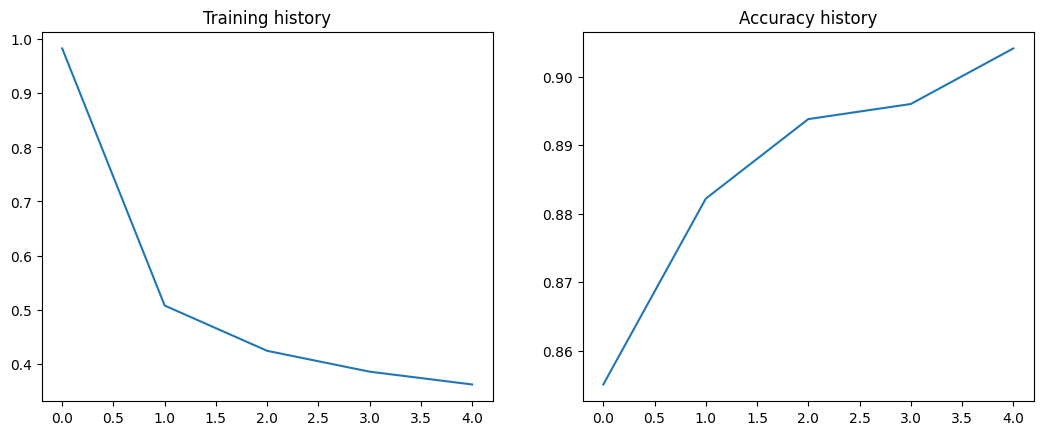

In [4]:
print('Fully connected MLP - Simard et al. 2003')

# config
batch_size = 128
test_batch_size = 512
epochs = 5

train_ds, test_ds = get_mnist_loaders(batch_size, test_batch_size)
model = FullyConnectedNet()
model.compile(optimizer=optimizer, loss=loss_func, metrics=['accuracy'])

train_history = model.fit(
	train_ds,
	validation_data=test_ds,
	validation_batch_size=test_batch_size,
	epochs=epochs
)

fig, (ax_train, ax_test) = plt.subplots(1, 2)
fig.set_size_inches(12.8, 4.8)

ax_train.plot(train_history.history['loss'])
ax_test.plot(train_history.history['val_accuracy'])
ax_train.set_title('Training history')
ax_test.set_title('Accuracy history')

plt.show(fig)

del train_ds, test_ds, model, train_history